### Загрузим данные:

In [2]:
import sys, os

sys.path.append(os.path.abspath(".."))

from estimators import DelayEstimator, EmbeddingDimensionEstimator
from delay_embedding import plot_delay_embedding
from data_provider.data_loader import Dataset_Custom

X = Dataset_Custom(
    root_path='../dataset/',
    data_path='national_illness.csv',
    flag='train',
    features='M'
).data_x

### Вычислим tau:

Первый локальный минимум τ: 17
Первый локальный максимум τ: 26


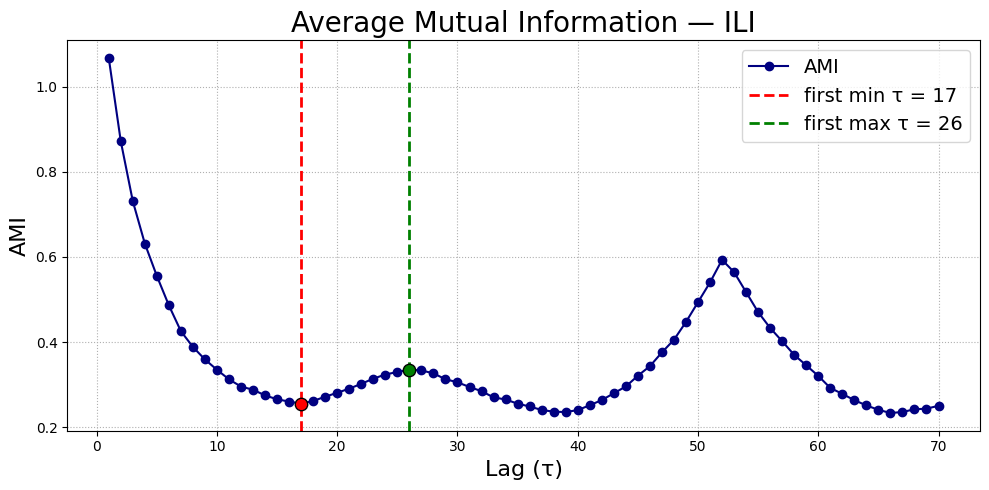

In [3]:
delay_est = DelayEstimator(max_tau=70, data_name="ILI", bins=10).fit(X)
print(f"Первый локальный минимум τ: {delay_est.tau_min}")
print(f"Первый локальный максимум τ: {delay_est.tau_max}")
delay_est.plot()

### Вычислим m:

Оптимальная размерность m: 5
Покрытие каналов: 100.0%


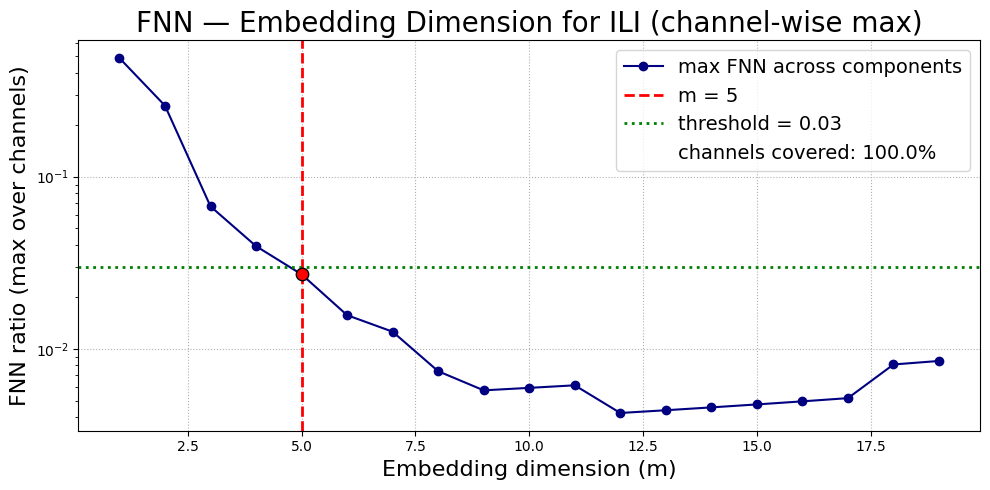

In [8]:
dim_est = EmbeddingDimensionEstimator(tau=delay_est.tau_min, m_max=20, data_name="ILI", threshold=0.03, multivariate=False).fit(X)
print(f"Оптимальная размерность m: {dim_est.m_opt}")
print(f"Покрытие каналов: {dim_est.coverage_ratio * 100:.1f}%")
dim_est.plot()

### Визуализируем полученные эмбеддинги:

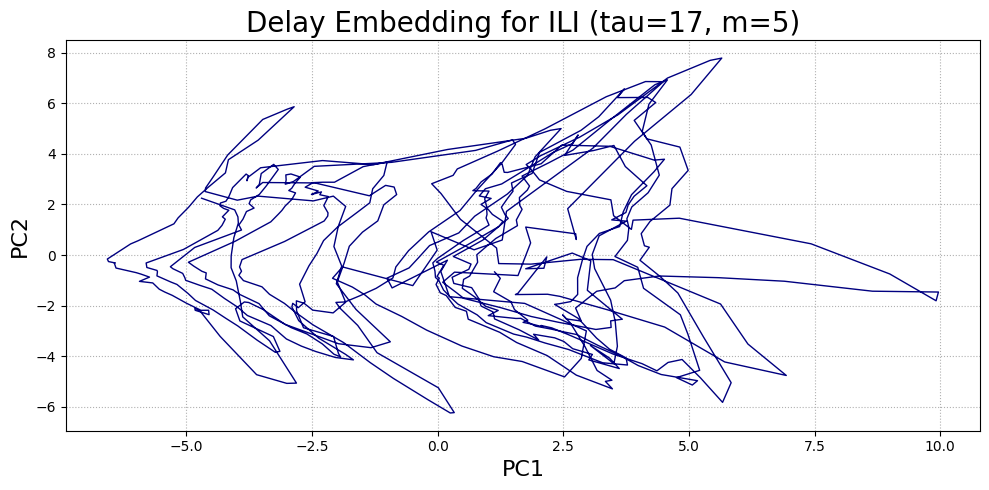

In [13]:
plot_delay_embedding(X, tau=delay_est.tau_min, m=dim_est.m_opt, data_name="ILI")

### Визуализируем оптимальные эмбеддинги:

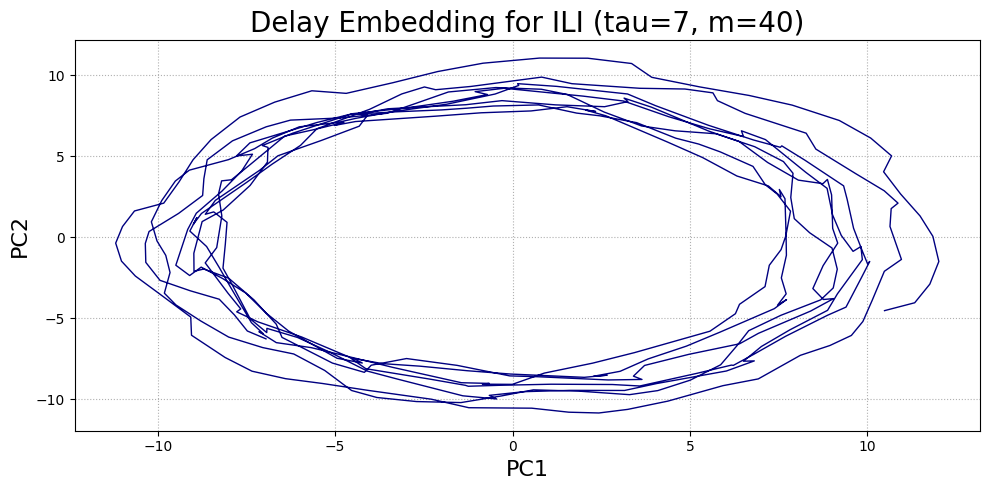

In [163]:
plot_delay_embedding(X, tau=7, m=40, data_name="ILI")

### Визуализируем эмбеддинги из оригинальной статьи:

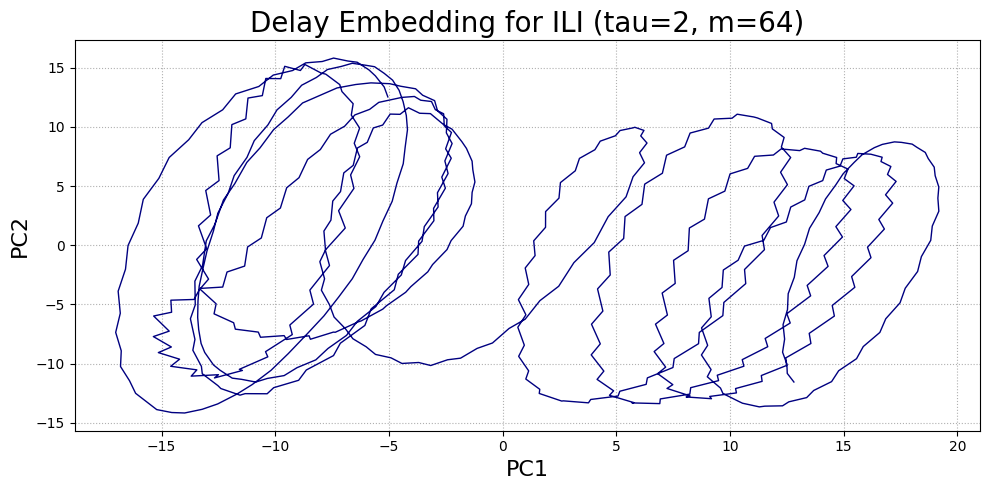

In [165]:
plot_delay_embedding(X, tau=2, m=64, data_name="ILI")

Видим, что полученные нами эмбеддинги хуже, чем предложенные в оригинальной статье, однако оптимальные эмбеддинги на порядок лучше обоих вариантов.